In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge

In [2]:
ipl_auction_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\IPL IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [3]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [4]:
X_features = ['AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [5]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns= categorical_features, drop_first= True)

In [6]:
ipl_auction_encoded_df = ipl_auction_encoded_df.drop(columns = ['TEAM'])

In [7]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [8]:
boolean_columns = ipl_auction_encoded_df.select_dtypes(include= ['bool']).columns
for col in boolean_columns:
    ipl_auction_encoded_df[col] = ipl_auction_encoded_df[col].astype(int)

In [9]:
ipl_auction_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T-RUNS                  130 non-null    int64  
 1   T-WKTS                  130 non-null    int64  
 2   ODI-RUNS-S              130 non-null    int64  
 3   ODI-SR-B                130 non-null    float64
 4   ODI-WKTS                130 non-null    int64  
 5   ODI-SR-BL               130 non-null    float64
 6   RUNS-S                  130 non-null    int64  
 7   HS                      130 non-null    int64  
 8   AVE                     130 non-null    float64
 9   SR-B                    130 non-null    float64
 10  SIXERS                  130 non-null    int64  
 11  RUNS-C                  130 non-null    int64  
 12  WKTS                    130 non-null    int64  
 13  AVE-BL                  130 non-null    float64
 14  ECON                    130 non-null    fl

In [10]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

In [11]:
# inititalise the standardscaler 
X_scaler = StandardScaler()
# standardise all the feature columns
X_scaled = X_scaler.fit_transform(X)

# standerdise y explictly by subtratcting mean and dividing by standard deviation
Y = (Y-Y.mean())/Y.std()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,test_size =0.2, random_state = 42)

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [14]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [15]:
columns_coef_df = pd.DataFrame({'columns' : ipl_auction_encoded_df.columns, 'coef': linreg.coef_})

In [16]:
#sortng the features by coefficient values in decsending order
sorted_coef_vals = columns_coef_df.sort_values('coef', ascending = False)

Text(0, 0.5, 'Features')

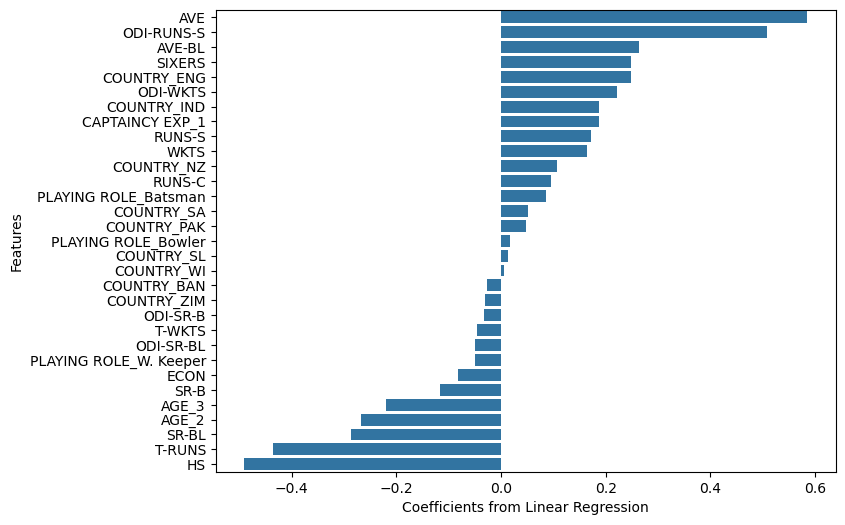

In [17]:
plt.figure( figsize = (8,6))
sns.barplot(x = "coef", y= "columns", data = sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")

In [18]:
from sklearn import metrics

In [19]:
def get_train_test_rmse(model):
    #Predicting on training dataset
    Y_train_pred = model.predict(X_train)
    # compare the actual y with predicting
    rmse_train = round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),3)
    # predicting on test dataset
    Y_test_pred = model.predict(X_test)
    #compare the actual Y with predicting Y in the test dataset
    rmse_test = round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)),3)
    print("train: ", rmse_train, "test: ", rmse_test )

In [20]:
get_train_test_rmse(linreg)

train:  0.679 test:  0.749


In [21]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, Y_train)

Ridge(alpha=1, max_iter=500)

In [22]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit(X_train, Y_train)
get_train_test_rmse(ridge)

train:  0.682 test:  0.706


In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, max_iter=500)

In [24]:
get_train_test_rmse(lasso)

train:  0.688 test:  0.698


In [25]:
lasso_coef_df = pd.DataFrame({'columns' : ipl_auction_encoded_df.columns, 'coef': lasso.coef_})

In [26]:
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0
